# Forecasting Net Prophet

You’re a growth analyst at [MercadoLibre](http://investor.mercadolibre.com/about-us). With over 200 million users, MercadoLibre is the most popular e-commerce site in Latin America. You've been tasked with analyzing the company's financial and user data in clever ways to make the company grow. So, you want to find out if the ability to predict search traffic can translate into the ability to successfully trade the stock.

The instructions for this Challenge are divided into four steps, as follows:

* Step 1: Find unusual patterns in hourly Google search traffic

* Step 2: Mine the search traffic data for seasonality

* Step 3: Relate the search traffic to stock price patterns

* Step 4: Create a time series model with Prophet

The following subsections detail these steps.

## Install and import the required libraries and dependencies

In [1]:
!pip install pandas matplotlib seaborn prophet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

## Step 1: Find Unusual Patterns in Hourly Google Search Traffic

The data science manager asks if the Google search traffic for the company links to any financial events at the company. Or, does the search traffic data just present random noise? To answer this question, pick out any unusual patterns in the Google search data for the company, and connect them to the corporate financial events.

To do so, complete the following steps:

1. Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

2. Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?


#### Step 1: Read the search data into a DataFrame, and then slice the data to just the month of May 2020. (During this month, MercadoLibre released its quarterly financial results.) Visualize the results. Do any unusual patterns exist?

In [3]:
df_mercado_trends = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv",
    index_col='Date',
    parse_dates=True
)

# Review the first and last five rows of the DataFrame
display(df_mercado_trends.head())
display(df_mercado_trends.tail())

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_22648\3556682467.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_mercado_trends = pd.read_csv(


,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38


,Search Trends
Date,
2020-09-07 20:00:00,71
2020-09-07 21:00:00,83
2020-09-07 22:00:00,96
2020-09-07 23:00:00,97
2020-09-08 00:00:00,96


In [4]:
df_mercado_trends.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37106 entries, 2016-06-01 00:00:00 to 2020-09-08 00:00:00
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Search Trends  37106 non-null  int64
dtypes: int64(1)
memory usage: 579.8 KB


In [5]:
df_mercado_trends.columns

Index(['Search Trends'], dtype='object')

In [6]:
df_mercado_trends.index

DatetimeIndex(['2016-06-01 00:00:00', '2016-06-01 01:00:00',
               '2016-06-01 02:00:00', '2016-06-01 03:00:00',
               '2016-06-01 04:00:00', '2016-06-01 05:00:00',
               '2016-06-01 06:00:00', '2016-06-01 07:00:00',
               '2016-06-01 08:00:00', '2016-06-01 09:00:00',
               ...
               '2020-09-07 15:00:00', '2020-09-07 16:00:00',
               '2020-09-07 17:00:00', '2020-09-07 18:00:00',
               '2020-09-07 19:00:00', '2020-09-07 20:00:00',
               '2020-09-07 21:00:00', '2020-09-07 22:00:00',
               '2020-09-07 23:00:00', '2020-09-08 00:00:00'],
              dtype='datetime64[ns]', name='Date', length=37106, freq=None)

In [7]:
df_mercado_trends.loc['2016-06']

,Search Trends
Date,
2016-06-01 00:00:00,97
2016-06-01 01:00:00,92
2016-06-01 02:00:00,76
2016-06-01 03:00:00,60
2016-06-01 04:00:00,38
...,...
2016-06-30 19:00:00,54
2016-06-30 20:00:00,55
2016-06-30 21:00:00,61


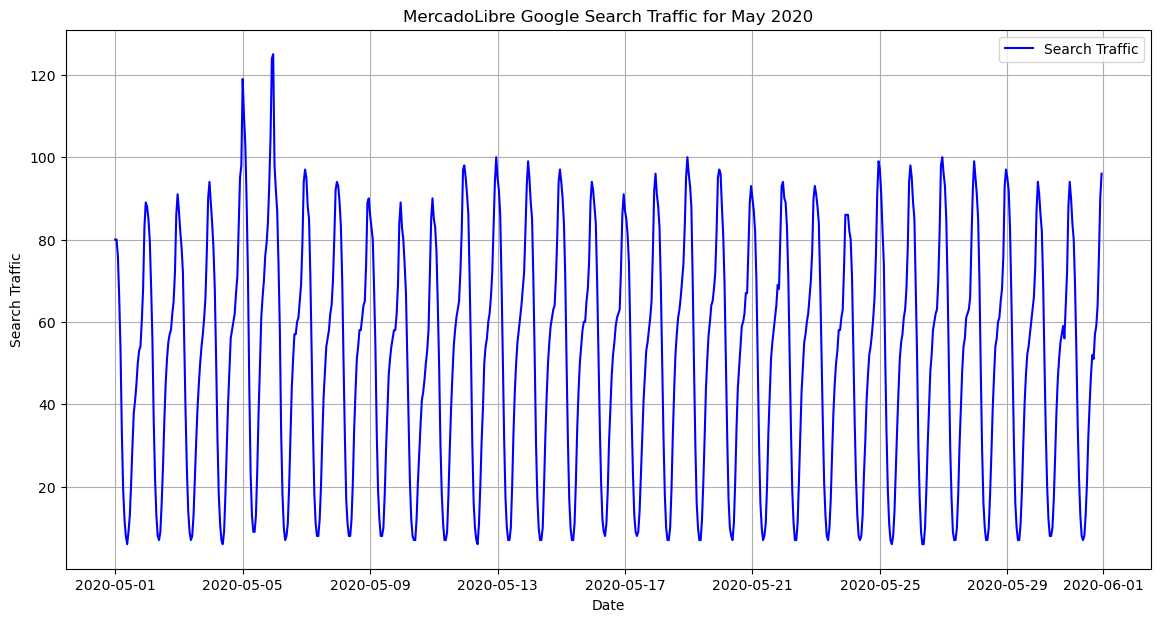

In [8]:
# Slice the DataFrame to just the month of May 2020
may_2020_df = df_mercado_trends.loc['2020-05']
#print(may_2020_data)
# Plot to visualize the data for May 2020
plt.figure(figsize=(14, 7))
plt.plot(may_2020_df.index, may_2020_df['Search Trends'], label='Search Traffic', color='blue')

plt.title('MercadoLibre Google Search Traffic for May 2020')
plt.xlabel('Date')
plt.ylabel('Search Traffic')
plt.grid(True)

plt.legend()

plt.show()

## Step 2: Calculate the total search traffic for the month, and then compare the value to the monthly median across all months. Did the Google search traffic increase during the month that MercadoLibre released its financial results?

In [9]:
# Calculate the sum of the total search traffic for May 2020
traffic_may_2020 = may_2020_df['Search Trends'].sum()
# View the traffic_may_2020 value
print(traffic_may_2020)

38181


In [10]:
# Calcluate the monhtly median search traffic across all months


# Group the DataFrame by index year and then index month, chain the sum and then the median functions
monthly_traffic = df_mercado_trends.groupby([df_mercado_trends.index.year, df_mercado_trends.index.month])['Search Trends'].sum()
median_monthly_traffic = monthly_traffic.median()
# View the median_monthly_traffic value
print(median_monthly_traffic)

35172.5


In [11]:
# Compare the seach traffic for the month of May 2020 to the overall monthly median value
traffic_may_2020/median_monthly_traffic

1.0855355746677091

In [12]:
# Calculate the total search traffic for May 2020
may_2020_traffic = may_2020_df['Search Trends'].sum()

# Compare May 2020 search traffic to the overall monthly median
if may_2020_traffic > median_monthly_traffic:
    print(f"May 2020 search traffic ({may_2020_traffic}) is higher than the monthly median ({median_monthly_traffic}).")
elif may_2020_traffic < median_monthly_traffic:
    print(f"May 2020 search traffic ({may_2020_traffic}) is lower than the monthly median ({median_monthly_traffic}).")
else:
    print(f"May 2020 search traffic ({may_2020_traffic}) is equal to the monthly median ({median_monthly_traffic}).")

May 2020 search traffic (38181) is higher than the monthly median (35172.5).


Question: Did the Google search traffic increase during the month that MercadoLibre released its financial results?

Answer: May 2020 search traffic (38181) is higher than the monthly median (35172.5) for about 8% increase. Google search traffic increased during the month of MercadoLibres financial results release. 

## Step 2: Mine the Search Traffic Data for Seasonality

Marketing realizes that they can use the hourly search data, too. If they can track and predict interest in the company and its platform for any time of day, they can focus their marketing efforts around the times that have the most traffic. This will get a greater return on investment (ROI) from their marketing budget.

To that end, you want to mine the search traffic data for predictable seasonal patterns of interest in the company. To do so, complete the following steps:

1. Group the hourly search data to plot the average traffic by the hour of day. Does the search traffic peak at a particular time of day or is it relatively consistent?

2. Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday). Does the search traffic get busiest on any particular day of the week?

3. Group the hourly search data to plot the average traffic by the week of the year. Does the search traffic tend to increase during the winter holiday period (weeks 40 through 52)?


#### Step 1: Group the hourly search data to plot the average traffic by the hour of the day.

In [13]:
df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv', parse_dates=['Date'])

df.set_index('Date', inplace=True)

C:\Users\Sandeep\AppData\Local\Temp\ipykernel_22648\3893477627.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/google_hourly_search_trends.csv', parse_dates=['Date'])


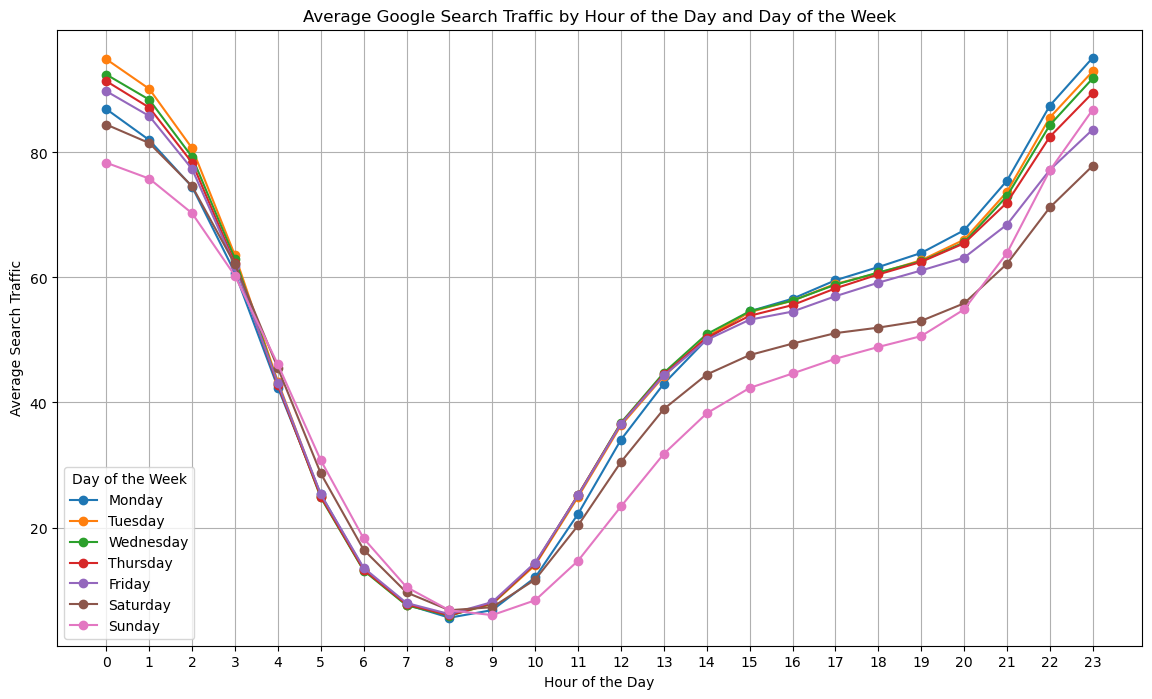

In [14]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.hour`
avg_traffic_by_day_hour = df.groupby([df.index.dayofweek, df.index.hour])['Search Trends'].mean().unstack()
plt.figure(figsize=(14, 8))
for day in avg_traffic_by_day_hour.index:
    plt.plot(avg_traffic_by_day_hour.columns, avg_traffic_by_day_hour.loc[day], marker='o', linestyle='-', label=f'Day {day}')

plt.title('Average Google Search Traffic by Hour of the Day and Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Search Traffic')
plt.grid(True)
plt.legend(title='Day of the Week', labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.xticks(range(0, 24))
plt.show()

#### Step 2: Group the hourly search data to plot the average traffic by the day of the week (for example, Monday vs. Friday).

In [15]:
# Group the hourly search data to plot the average traffic by the day of week, using `df.index.isocalendar().day`.

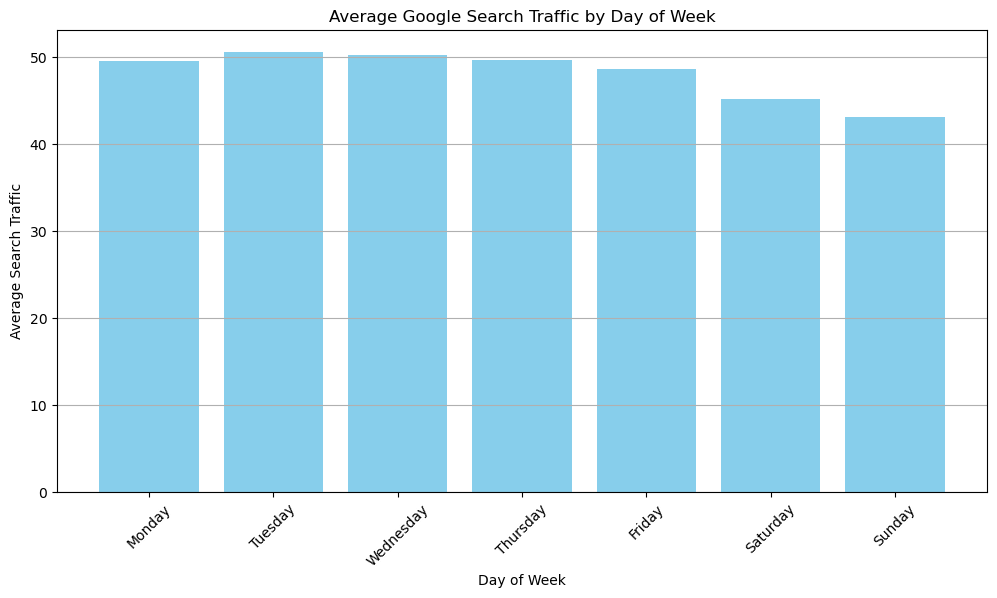

In [16]:
# Group by day of the week and calculate the average traffic
avg_traffic_by_day_of_week = df.groupby(df.index.dayofweek)['Search Trends'].mean()

# Map day of the week numbers to names for better readability
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_traffic_by_day_of_week.index = avg_traffic_by_day_of_week.index.map(lambda x: days_of_week[x])

# Plot the average traffic by day of the week
plt.figure(figsize=(12, 6))
plt.bar(avg_traffic_by_day_of_week.index, avg_traffic_by_day_of_week, color='skyblue')
plt.title('Average Google Search Traffic by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Search Traffic')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [17]:
#Step 3: Group the hourly search data to plot the average traffic by the week of the year.
# Group the hourly search data to plot the average traffic by the week of the year using `df.index.isocalendar().week`

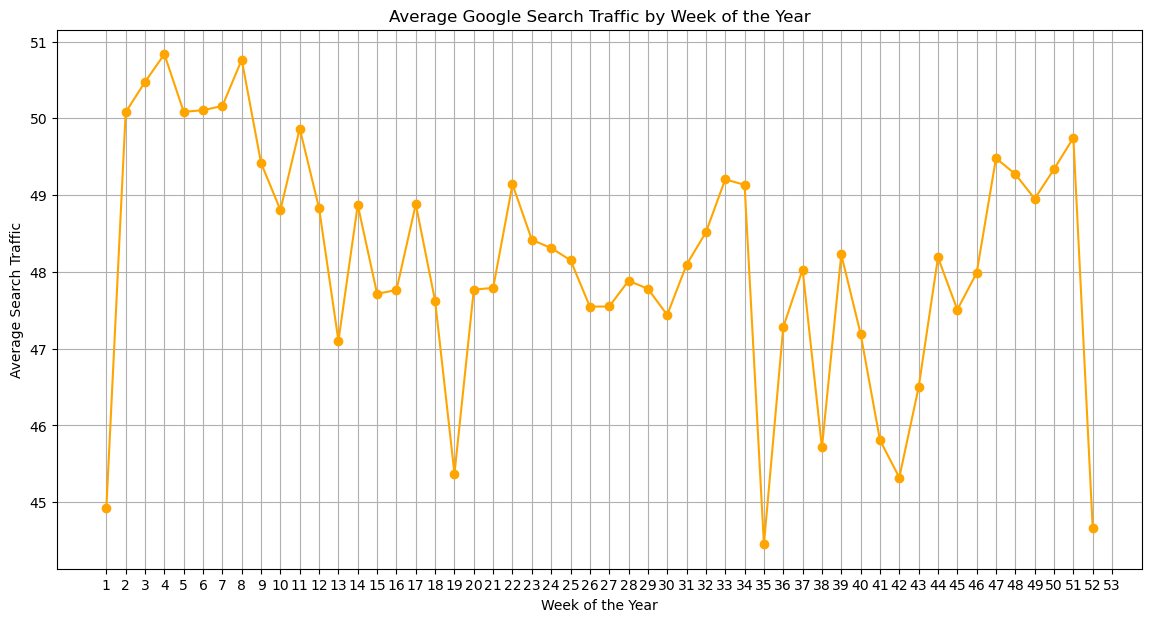

In [18]:
# Extract the week of the year and group by it to calculate the average traffic
weekly_avg_traffic = df.groupby(df.index.isocalendar().week)['Search Trends'].mean()

# Plot the average traffic by week of the year
plt.figure(figsize=(14, 7))
plt.plot(weekly_avg_traffic.index, weekly_avg_traffic, marker='o', linestyle='-', color='orange')
plt.title('Average Google Search Traffic by Week of the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Average Search Traffic')
plt.grid(True)
plt.xticks(range(1, 54))  # Week numbers range from 1 to 53
plt.show()

Question: Are there any time based trends that you can see in the data?
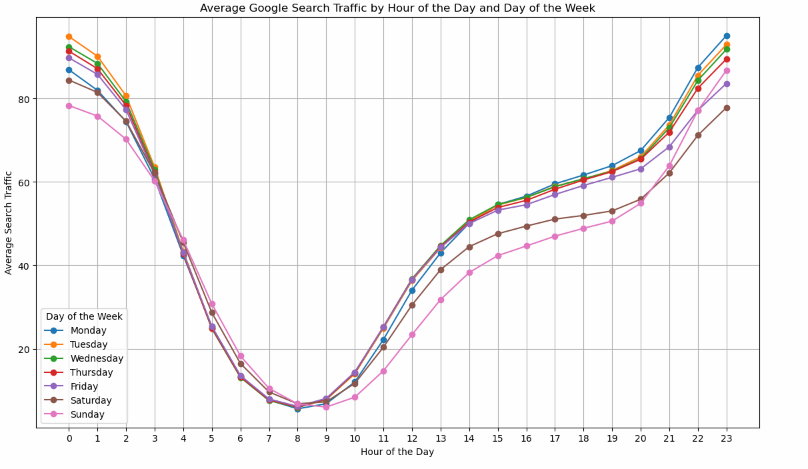
Answer: Yes, there is a time based trends in the data between 12am and 11pm and it seems there is more activity of search trends at the maximum point around 12am and 11pm. There is negative trend between 12am and 7am. There is a positive trend between 9am to 11pm. 



## Step 3: Relate the Search Traffic to Stock Price Patterns

You mention your work on the search traffic data during a meeting with people in the finance group at the company. They want to know if any relationship between the search data and the company stock price exists, and they ask if you can investigate.

To do so, complete the following steps:

1. Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

2. Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (`2020-01` to `2020-06` in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?

3. Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

    * “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

    * “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis

4. Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

#### Step 1: Read in and plot the stock price data. Concatenate the stock price data to the search data in a single DataFrame.

In [19]:
# Upload the "mercado_stock_price.csv" file into Colab, then store in a Pandas DataFrame
# Set the "date" column as the Datetime Index.
df_mercado_stock = pd.read_csv(
    "https://static.bc-edx.com/ai/ail-v-1-0/m8/lms/datasets/mercado_stock_price.csv",
    index_col="date",
    parse_dates=True
).dropna()

# View the first and last five rows of the DataFrame
display(df_mercado_stock.head())
display(df_mercado_stock.tail())

,close
date,
2015-01-02 09:00:00,127.67
2015-01-02 10:00:00,125.44
2015-01-02 11:00:00,125.57
2015-01-02 12:00:00,125.40
2015-01-02 13:00:00,125.17


,close
date,
2020-07-31 11:00:00,1105.780
2020-07-31 12:00:00,1087.925
2020-07-31 13:00:00,1095.800
2020-07-31 14:00:00,1110.650
2020-07-31 15:00:00,1122.510


Index(['close'], dtype='object')


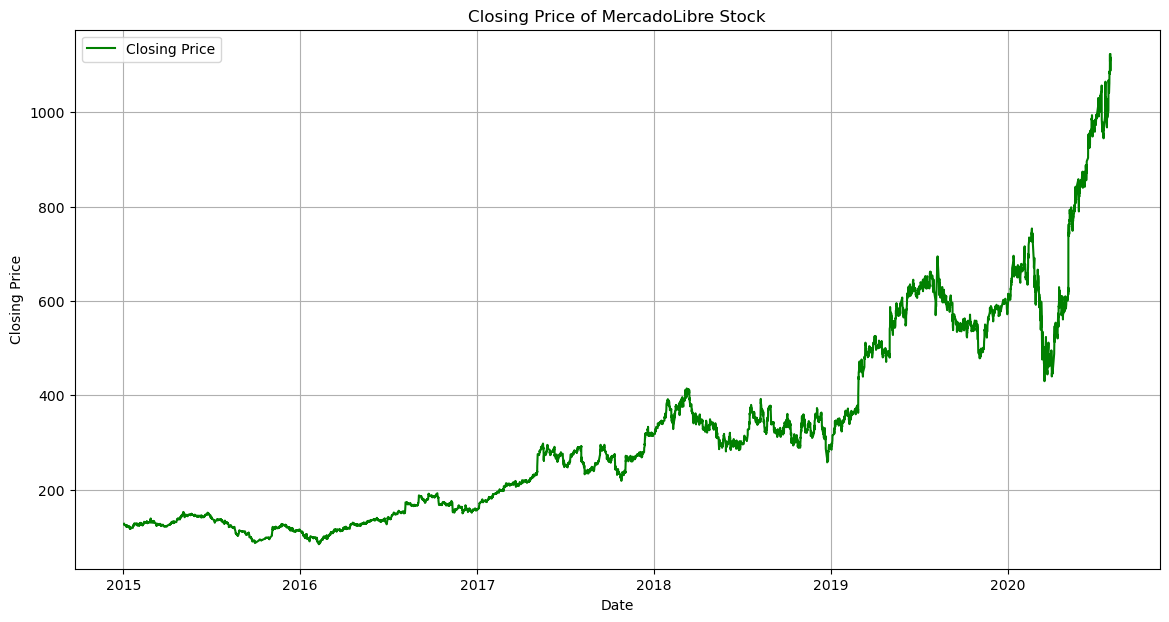

In [20]:
print(df_mercado_stock.columns)

# Visualize the closing price of the df_mercado_stock DataFrame
# Plotting the closing price
plt.figure(figsize=(14, 7))
plt.plot(df_mercado_stock.index, df_mercado_stock['close'], label='Closing Price', color='green')
plt.title('Closing Price of MercadoLibre Stock')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()

In [21]:
# Concatenate the df_mercado_stock DataFrame with the df_mercado_trends DataFrame
# Concatenate the DataFrame by columns (axis=1), and drop and rows with only one column of data

df_combined = pd.concat([df_mercado_trends, df_mercado_stock], axis=1)
df_combined.dropna(inplace=True)
# View the first and last five rows of the DataFrame
print("First five rows of the combined DataFrame:")
display(df_combined.head())

print("\nLast five rows of the combined DataFrame:")
display(df_combined.tail())

First five rows of the combined DataFrame:


,Search Trends,close
2016-06-01 09:00:00,6.0,135.16
2016-06-01 10:00:00,12.0,136.63
2016-06-01 11:00:00,22.0,136.56
2016-06-01 12:00:00,33.0,136.42
2016-06-01 13:00:00,40.0,136.10



Last five rows of the combined DataFrame:


,Search Trends,close
2020-07-31 11:00:00,20.0,1105.780
2020-07-31 12:00:00,32.0,1087.925
2020-07-31 13:00:00,41.0,1095.800
2020-07-31 14:00:00,47.0,1110.650
2020-07-31 15:00:00,53.0,1122.510


#Step 2: Market events emerged during the year of 2020 that many companies found difficult. But, after the initial shock to global financial markets, new customers and revenue increased for e-commerce platforms. Slice the data to just the first half of 2020 (2020-01 to 2020-06 in the DataFrame), and then plot the data. Do both time series indicate a common trend that’s consistent with this narrative?


In [22]:
# For the combined dataframe, slice to just the first half of 2020 (2020-01 through 2020-06)
df_first_half_2020 = df_combined.loc['2020-01-01':'2020-06-30']

# View the first and last five rows of the sliced DataFrame
print("First five rows of the first half of 2020 data:")
display(df_first_half_2020.head())

print("\nLast five rows of the first half of 2020 data:")
display(df_first_half_2020.tail())


First five rows of the first half of 2020 data:


,Search Trends,close
2020-01-02 09:00:00,9.0,601.085
2020-01-02 10:00:00,14.0,601.290
2020-01-02 11:00:00,25.0,615.410
2020-01-02 12:00:00,37.0,611.400
2020-01-02 13:00:00,50.0,611.830



Last five rows of the first half of 2020 data:


,Search Trends,close
2020-06-30 11:00:00,17.0,976.17
2020-06-30 12:00:00,27.0,977.50
2020-06-30 13:00:00,37.0,973.23
2020-06-30 14:00:00,45.0,976.50
2020-06-30 15:00:00,51.0,984.93


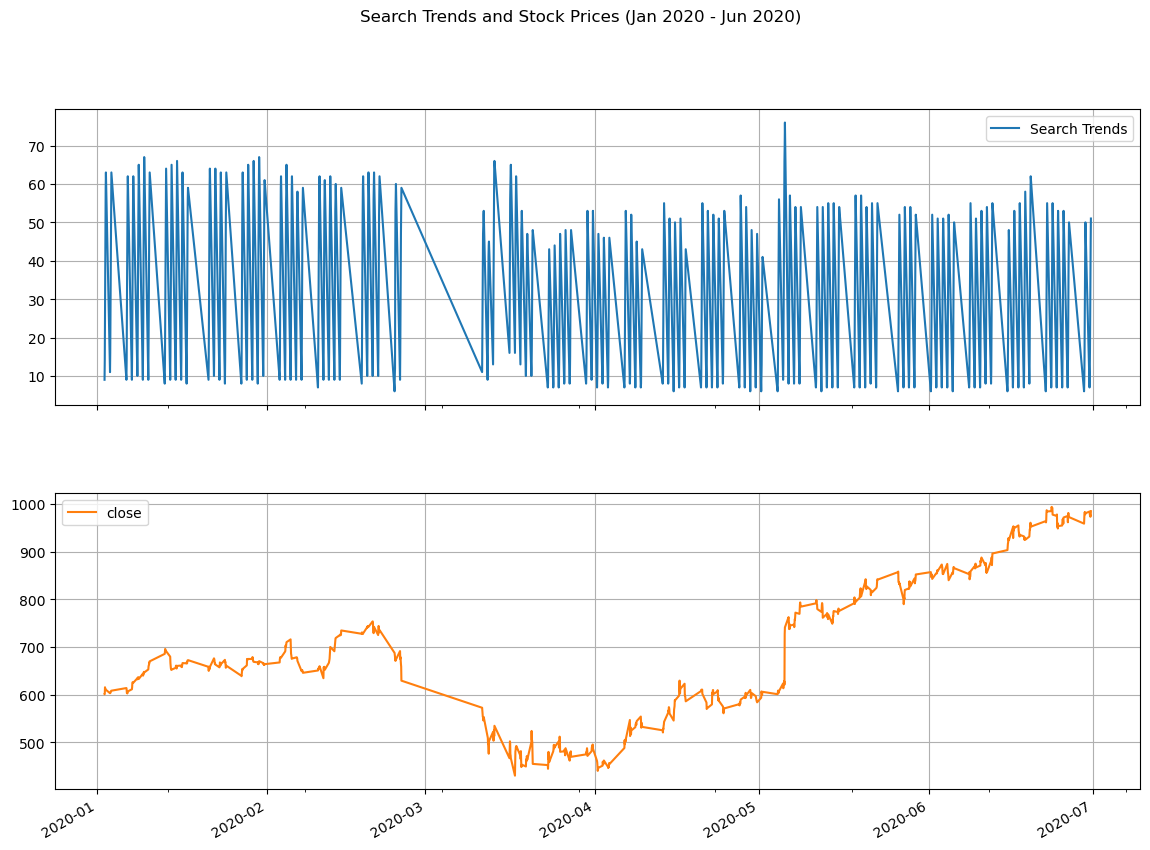

In [23]:
# Visualize the close and Search Trends data
# Plot each column on a separate axes using the following syntax
# `plot(subplots=True)`
# Plot the data with separate subplots for each column
df_first_half_2020.plot(subplots=True, figsize=(14, 10), title='Search Trends and Stock Prices (Jan 2020 - Jun 2020)', grid=True)

# Customize the plots
plt.subplots_adjust(hspace=0.3)  # Adjust space between subplots
plt.show()

Question: Do both time series indicate a common trend that’s consistent with this narrative?

Answer: Blue Arrows in the plot below shows some correaltion in the month of March and April where the closing trends goes downward and during the month of May and it also shows a updward trend after May. Also, the search trends do not show the upward trends in closing price, this makes it harder for search trends to predict the closing price.  
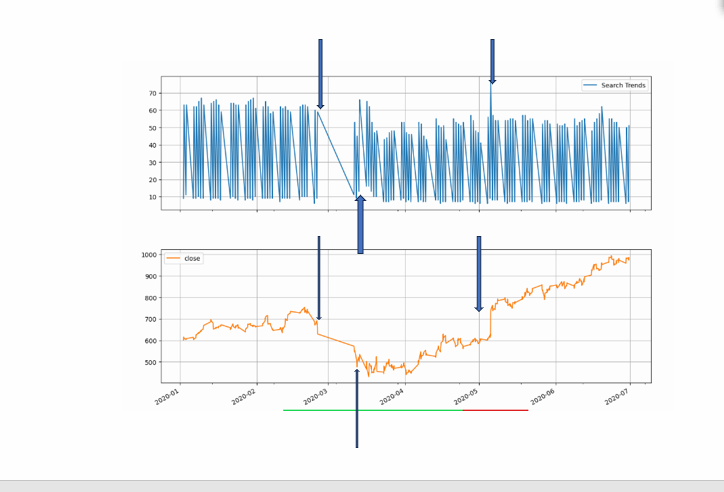

#### Step 3: Create a new column in the DataFrame named “Lagged Search Trends” that offsets, or shifts, the search traffic by one hour. Create two additional columns:

* “Stock Volatility”, which holds an exponentially weighted four-hour rolling average of the company’s stock volatility

* “Hourly Stock Return”, which holds the percent change of the company's stock price on an hourly basis


In [24]:
# Create a new column in the mercado_stock_trends_df DataFrame called Lagged Search Trends
df_combined['Lagged Search Trends'] = df_combined['Search Trends'].shift(1)
# This column should shift the Search Trends information by one hour
display(df_combined.head())

,Search Trends,close,Lagged Search Trends
2016-06-01 09:00:00,6.0,135.16,NaN
2016-06-01 10:00:00,12.0,136.63,6.0
2016-06-01 11:00:00,22.0,136.56,12.0
2016-06-01 12:00:00,33.0,136.42,22.0
2016-06-01 13:00:00,40.0,136.10,33.0


In [25]:
# Create a new column in the mercado_stock_trends_df DataFrame called Stock Volatility
# This column should calculate the standard deviation of the closing stock price return data over a 4 period rolling window
df_combined['Hourly Stock Return'] = df_combined['close'].pct_change()
df_combined['Stock Volatility'] = df_combined['Hourly Stock Return'].rolling(window=4).std()

# View the first few rows to check the new columns
display(df_combined.head())


,Search Trends,close,Lagged Search Trends,Hourly Stock Return,Stock Volatility
2016-06-01 09:00:00,6.0,135.16,NaN,NaN,NaN
2016-06-01 10:00:00,12.0,136.63,6.0,0.010876,NaN
2016-06-01 11:00:00,22.0,136.56,12.0,-0.000512,NaN
2016-06-01 12:00:00,33.0,136.42,22.0,-0.001025,NaN
2016-06-01 13:00:00,40.0,136.10,33.0,-0.002346,0.006134


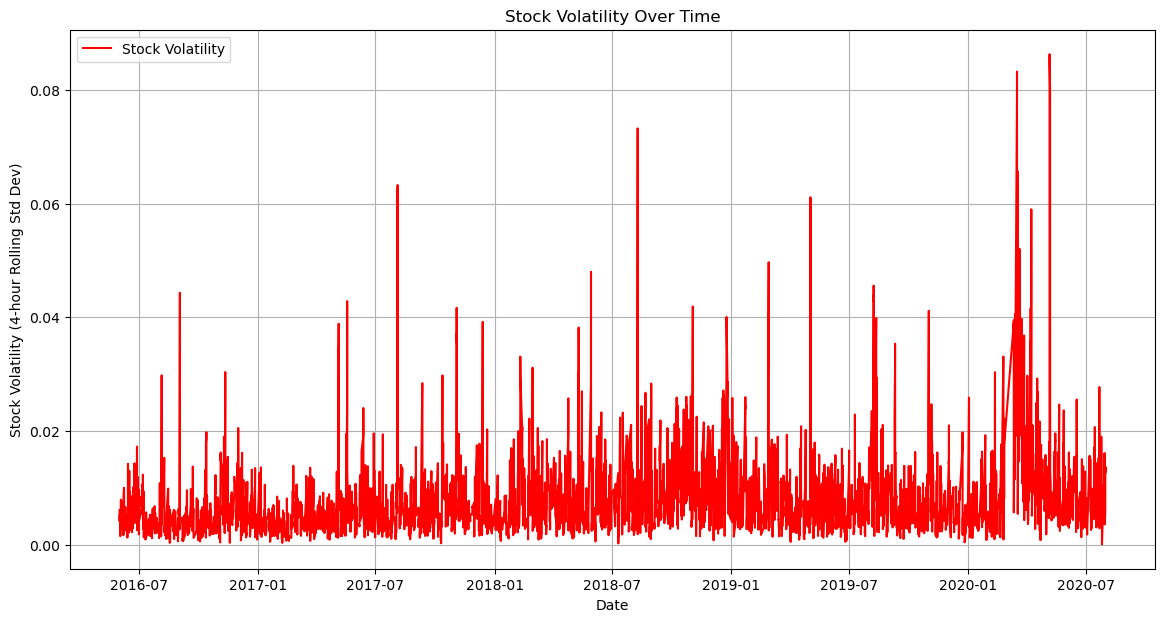

In [26]:
# Visualize the stock volatility
plt.figure(figsize=(14, 7))
plt.plot(df_combined.index, df_combined['Stock Volatility'], color='red', label='Stock Volatility')
plt.title('Stock Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Volatility (4-hour Rolling Std Dev)')
plt.grid(True)
plt.legend()
plt.show()

*Solution Note:** Note how volatility spiked, and tended to stay high, during the first half of 2020. This is a common characteristic of volatility in stock returns worldwide: high volatility days tend to be followed by yet more high volatility days. When it rains, it pours.

In [27]:
# Create a new column in the mercado_stock_trends_df DataFrame called Hourly Stock Return
df_combined['Hourly Stock Return'] = df_combined['close'].pct_change()


# This column should calculate hourly return percentage of the closing price
display(df_combined.head())
display(df_combined.tail())

,Search Trends,close,Lagged Search Trends,Hourly Stock Return,Stock Volatility
2016-06-01 09:00:00,6.0,135.16,NaN,NaN,NaN
2016-06-01 10:00:00,12.0,136.63,6.0,0.010876,NaN
2016-06-01 11:00:00,22.0,136.56,12.0,-0.000512,NaN
2016-06-01 12:00:00,33.0,136.42,22.0,-0.001025,NaN
2016-06-01 13:00:00,40.0,136.10,33.0,-0.002346,0.006134


,Search Trends,close,Lagged Search Trends,Hourly Stock Return,Stock Volatility
2020-07-31 11:00:00,20.0,1105.780,11.0,0.006380,0.012837
2020-07-31 12:00:00,32.0,1087.925,20.0,-0.016147,0.013549
2020-07-31 13:00:00,41.0,1095.800,32.0,0.007239,0.013295
2020-07-31 14:00:00,47.0,1110.650,41.0,0.013552,0.013001
2020-07-31 15:00:00,53.0,1122.510,47.0,0.010678,0.013566


#### Step 4: Review the time series correlation, and then answer the following question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

In [28]:
# Construct correlation table of Stock Volatility, Lagged Search Trends, and Hourly Stock Return
# Construct the correlation table
df_combined[['Stock Volatility', 'Lagged Search Trends', 'Hourly Stock Return']].corr()

,Stock Volatility,Lagged Search Trends,Hourly Stock Return
Stock Volatility,1.000000,-0.148938,0.061424
Lagged Search Trends,-0.148938,1.000000,0.017929
Hourly Stock Return,0.061424,0.017929,1.000000


Question: Does a predictable relationship exist between the lagged search traffic and the stock volatility or between the lagged search traffic and the stock price returns?

Answer: The correlation values are close to 0, So there may not be a clear predictable relationship between the lagged search traffic and the stock metrics hourly return. Lagged Search trends from the table above also shows a slight negative correlation between stock volatility by -14%. 

## Step 4: Create a Time Series Model with Prophet

Now, you need to produce a time series model that analyzes and forecasts patterns in the hourly search data. To do so, complete the following steps:

1. Set up the Google search data for a Prophet forecasting model.

2. After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

3. Plot the individual time series components of the model to answer the following questions:

    * What time of day exhibits the greatest popularity?

    * Which day of the week gets the most search traffic?

    * What's the lowest point for search traffic in the calendar year?


In [29]:
#STEP 4 : Set up the Google search data for a Prophet forecasting model.
# Using the df_mercado_trends DataFrame, reset the index so the date information is no longer the index

df_mercado_trends_reset = df_mercado_trends.reset_index()
# Label the columns ds and y so that the syntax is recognized by Prophet
df_prophet = df_mercado_trends_reset.rename(columns={'Date': 'ds', 'Search Trends': 'y'})


# Drop an NaN values from the prophet_df DataFrame

df_prophet = df_prophet.dropna()
# View the first and last five rows of the mercado_prophet_df DataFrame
display(df_prophet.head())
display(df_prophet.tail())

,ds,y
0,2016-06-01 00:00:00,97
1,2016-06-01 01:00:00,92
2,2016-06-01 02:00:00,76
3,2016-06-01 03:00:00,60
4,2016-06-01 04:00:00,38


,ds,y
37101,2020-09-07 20:00:00,71
37102,2020-09-07 21:00:00,83
37103,2020-09-07 22:00:00,96
37104,2020-09-07 23:00:00,97
37105,2020-09-08 00:00:00,96


In [30]:
# Call the Prophet function, store as an object
from prophet import Prophet

# Initialize the Prophet model
model = Prophet()

# Fit the model to the data
model.fit(df_prophet)

23:33:15 - cmdstanpy - INFO - Chain [1] start processing
23:34:10 - cmdstanpy - INFO - Chain [1] done processing


In [31]:
# Fit the time-series model.
df_prophet = df_mercado_trends.reset_index().rename(columns={'Date': 'ds', 'Search Trends': 'y'})

# Drop NaN values
df_prophet = df_prophet.dropna()

In [32]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 2000 hours (approx 80 days)
future_mercado_trends = model.make_future_dataframe(periods=2000, freq='H')

# View the last five rows of the future_mercado_trends DataFrame
display(future_mercado_trends.tail())

C:\Users\Sandeep\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
39101,2020-11-30 04:00:00
39102,2020-11-30 05:00:00
39103,2020-11-30 06:00:00
39104,2020-11-30 07:00:00
39105,2020-11-30 08:00:00


In [33]:
# Make the predictions for the trend data using the future_mercado_trends DataFrame

forecast_mercado_trends = model.predict(future_mercado_trends)
# Display the first five rows of the forecast_mercado_trends DataFrame
display(forecast_mercado_trends.head())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-06-01 00:00:00,44.352625,81.466443,98.089024,44.352625,44.352625,45.307367,45.307367,45.307367,41.452720,...,1.860390,1.860390,1.860390,1.994257,1.994257,1.994257,0.0,0.0,0.0,89.659992
1,2016-06-01 01:00:00,44.353557,76.972497,94.453723,44.353557,44.353557,41.753097,41.753097,41.753097,37.943514,...,1.810288,1.810288,1.810288,1.999294,1.999294,1.999294,0.0,0.0,0.0,86.106654
2,2016-06-01 02:00:00,44.354489,67.909587,84.450128,44.354489,44.354489,31.429548,31.429548,31.429548,27.656552,...,1.768695,1.768695,1.768695,2.004301,2.004301,2.004301,0.0,0.0,0.0,75.784037
3,2016-06-01 03:00:00,44.355421,52.192979,69.004882,44.355421,44.355421,16.162280,16.162280,16.162280,12.417302,...,1.735704,1.735704,1.735704,2.009275,2.009275,2.009275,0.0,0.0,0.0,60.517701
4,2016-06-01 04:00:00,44.356353,34.182997,52.199362,44.356353,44.356353,-0.952639,-0.952639,-0.952639,-4.678127,...,1.711270,1.711270,1.711270,2.014218,2.014218,2.014218,0.0,0.0,0.0,43.403713


#### Step 2: After estimating the model, plot the forecast. How's the near-term forecast for the popularity of MercadoLibre?

C:\Users\Sandeep\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Sandeep\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


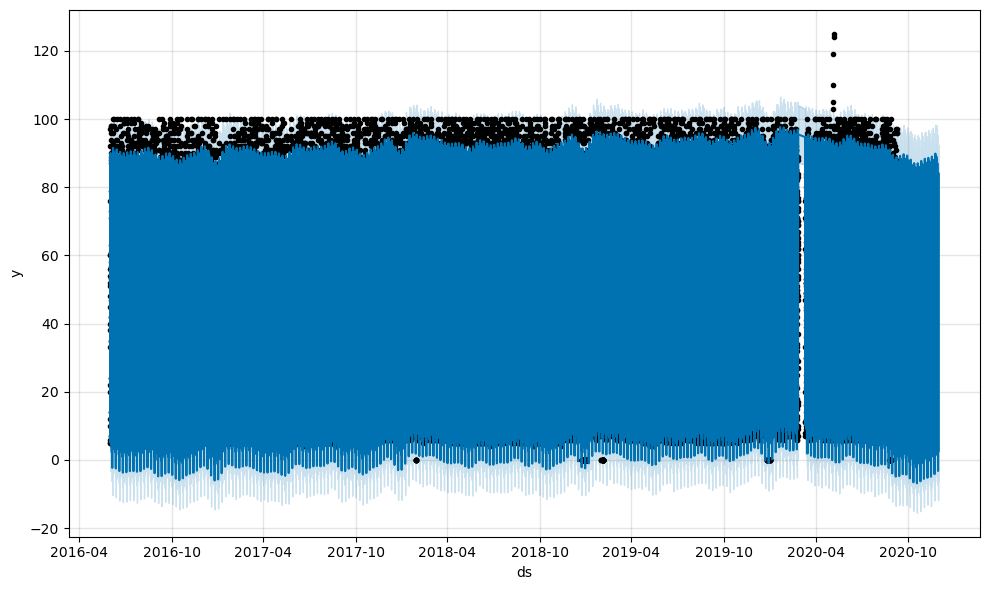

In [34]:
# Plot the Prophet predictions for the Mercado trends data
fig = model.plot(forecast_mercado_trends)

# Display the plot
plt.show()

Question: How's the near-term forecast for the popularity of MercadoLibre?

Answer: The near-term forecast for the popularity of MercadoLibre is showing downward trend and then it rises back up, but it does not go above the average actual values. By looking at the plot above it shows a U-shape.

#### Step 3: Plot the individual time series components of the model to answer the following questions:

* What time of day exhibits the greatest popularity?

* Which day of the week gets the most search traffic?

* What's the lowest point for search traffic in the calendar year?


In [35]:
# Set the index in the forecast_mercado_trends DataFrame to the ds datetime column
# View the only the yhat,yhat_lower and yhat_upper columns from the DataFrame

forecast_mercado_trends.set_index('ds', inplace=True)

# View only the yhat, yhat_lower, and yhat_upper columns
forecast_subset = forecast_mercado_trends[['yhat', 'yhat_lower', 'yhat_upper']]

# Display the first and last five rows of the subset DataFrame
display(forecast_subset.head())
display(forecast_subset.tail())

,yhat,yhat_lower,yhat_upper
ds,,,
2016-06-01 00:00:00,89.659992,81.466443,98.089024
2016-06-01 01:00:00,86.106654,76.972497,94.453723
2016-06-01 02:00:00,75.784037,67.909587,84.450128
2016-06-01 03:00:00,60.517701,52.192979,69.004882
2016-06-01 04:00:00,43.403713,34.182997,52.199362


,yhat,yhat_lower,yhat_upper
ds,,,
2020-11-30 04:00:00,39.507473,30.268404,48.270517
2020-11-30 05:00:00,24.036286,14.949569,32.612105
2020-11-30 06:00:00,12.070566,4.173440,21.047605
2020-11-30 07:00:00,4.798365,-3.217409,13.447036
2020-11-30 08:00:00,2.603438,-6.332479,10.703375


Solutions Note: `yhat` represents the most likely (average) forecast, whereas `yhat_lower` and `yhat_upper` represents the worst and best case prediction (based on what are known as 95% confidence intervals).

<Axes: xlabel='ds'>

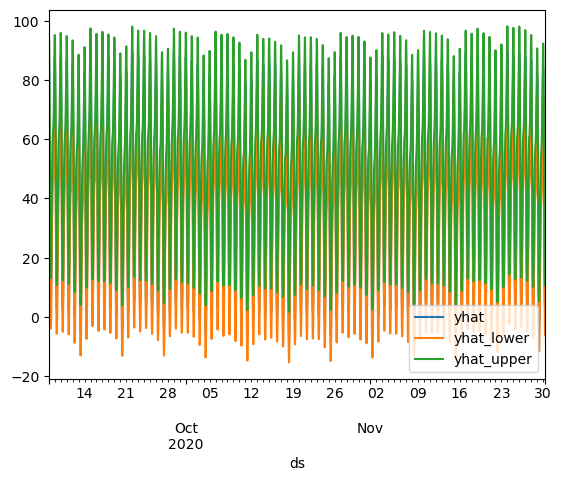

In [36]:
# From the forecast_mercado_trends DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 2000 hours

forecast_last_2000_hours = forecast_mercado_trends.tail(2000)[['yhat', 'yhat_lower', 'yhat_upper']]
forecast_last_2000_hours.plot()

# Plot the yhat, yhat_lower, and yhat_upper columns
# plt.figure(figsize=(14, 7))
# plt.plot(forecast_last_2000_hours.index, forecast_last_2000_hours['yhat'], label='Predicted (yhat)', color='blue')
# plt.fill_between(forecast_last_2000_hours.index,
#                  forecast_last_2000_hours['yhat_lower'],
#                  forecast_last_2000_hours['yhat_upper'],
#                  color='blue', alpha=0.2, label='Uncertainty Interval')

# # Customize the plot
# plt.title('Prophet Forecast for the Last 2000 Hours')
# plt.xlabel('Date')
# plt.ylabel('Search Trends')
# plt.legend()
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()

# # Display the plot
# plt.show()

C:\Users\Sandeep\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Sandeep\anaconda3\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\Sandeep\anaconda3\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavi

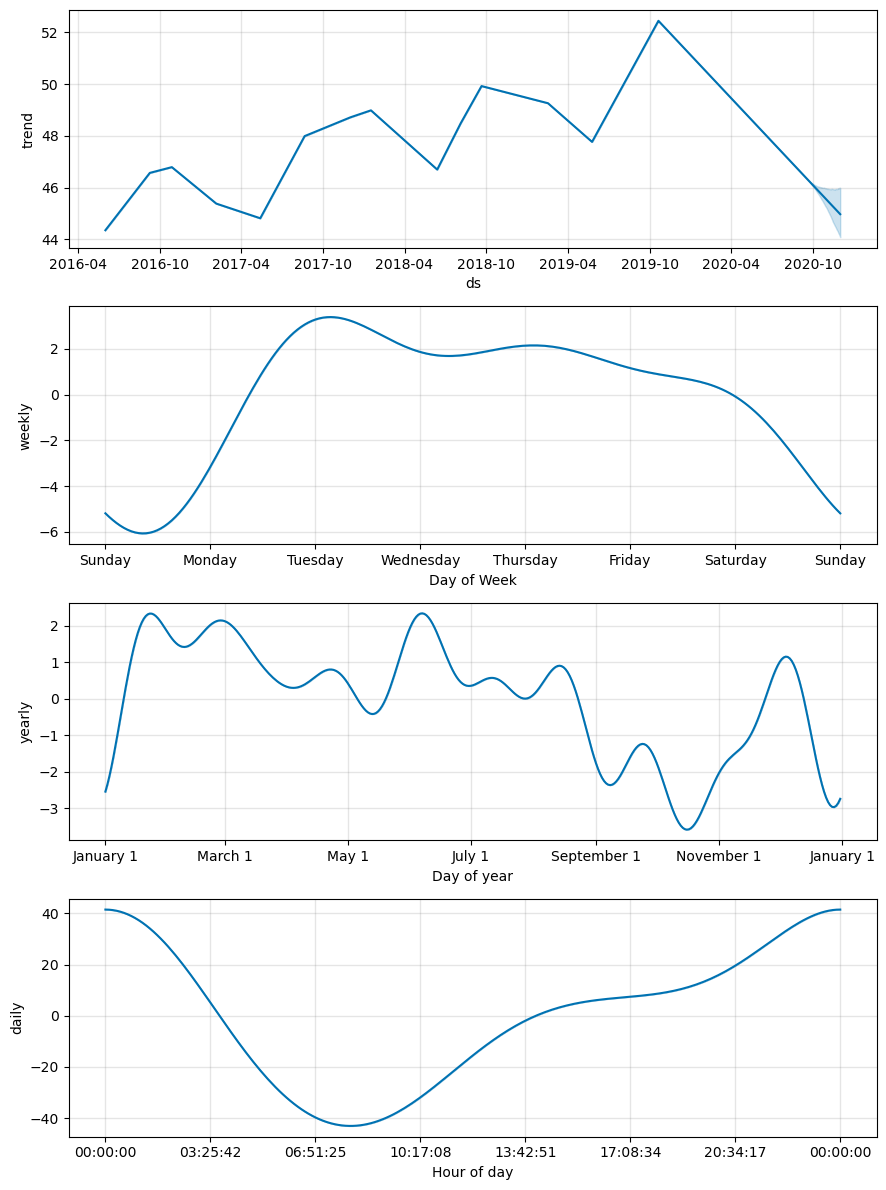

In [37]:
# Reset the index in the forecast_mercado_trends DataFrame
forecast_mercado_trends_reset = forecast_mercado_trends.reset_index()

# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame
fig = model.plot_components(forecast_mercado_trends_reset)

# Display the plot
plt.show()

Q1. What time of day exhibits the greatest popularity?

The time of day exhibits the greatest popularity starts between 20:34 (8:30pm) and 00.00 (12am). 

Q2. Which day of the week gets the most search traffic?
Tuesday

Q3. What's the lowest point for search traffic in the calendar year?
Middle of October 